<center><h1>27 Day F10.7 Forecast Verification for [dates] <br> </h1></center><br>
<center>John Mayers, Physical Scientist <br> NOAA Space Weather Prediction Center</center>

The Space Weather Prediction Center produces 27 Day geomagnetic and radio forecasts found in the ["Weekly Highlights and 27-day Forecast"](https://www.swpc.noaa.gov/products/weekly-highlights-and-27-day-forecast). These forecast are not archived in a database and can only be found in these PDF documents. In order to assess forecast accuracy and skill, the forecasts have to be extracted from these PDF files into a readable format. This fist part of this program will extract the forecasts from the PDF files (found on page 4) using tabula-py then convert them into text files. The text files will then be read into Pandas dataframes for additional analysis. Once cleaned, these forecasts can be compared against observed values in order to obtain accuracy and skill scores. Observed data are archived in a database and have been made available in an .xlsx spreadsheet.

This notebook will demonstrate proof of concept using a test dataset.

In [1]:
import pandas as pd
import tabula
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    
from tabula.io import read_pdf
from tabulate import tabulate
from tabula.io import convert_into
from tqdm import tqdm
from datetime import datetime, timedelta
from numpy import nan
from matplotlib.pyplot import figure
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

<h3>Navigating to files</h3>

**Step 1**: Change the working directory

In [2]:
#change working directory to location of pdf files and set to variable
    
os.chdir('C:/Users/john.mayers/Documents/27_Day/Data/test_data/')
directory = 'C:/Users/john.mayers/Documents/27_Day/Data/test_data/'
print(f'The current working directory is {os. getcwd()}.')

The current working directory is C:\Users\john.mayers\Documents\27_Day\Data\test_data.


**Step 2**: Confirm the number of PDF files in the directory to be converted

In [3]:
pdf_ls = []
for file in glob.glob("*.pdf"):
    pdf_ls.append(file)
pdf_ls

num_pdfs = len(pdf_ls)

print(f'The are {num_pdfs} PDF files in this folder.')

The are 5 PDF files in this folder.


<h3>Preparing to use tabula-py to convert PDF to TXT</h3>

The tabula-py wrapper has a specific format *(convert_into(input_filename, output_filename, pages=all)* to read PDF files and convert to TXT. Since hundreds of PDF files will need to be processed, loops will be needed to iterate through input and output filenames.

**Step 1**: Create iterable output filenames

In [4]:
#creating a list of output_filenames from PDF filenames in dir but with .txt extension

filenames = os.listdir() #list all PDF files in folder and save to variable
filenames = [i.split('.', 1)[0] for i in filenames] #remove file extension from list of files and resave to variable

ls=[]

for i in range(len(filenames)):
    w = os.path.join(directory + filenames[i]+ ".txt") #concat directory, filenames with .txt extension
    ls.append(w)
    
print(f'The output file paths will look like {ls[0]}.')

The output file paths will look like C:/Users/john.mayers/Documents/27_Day/Data/test_data/prf2314.txt.


**Step 2**: Create iterable input filenames

In [5]:
#creating a list of input_filenames

ls1=[]

for i in range(len(filenames)):
    r = os.path.join(directory + filenames[i]+ ".pdf") #concat directory, filenames, with .pdf extension
    ls1.append(r)

print(f'The input file paths will look like: {ls1[0]}.')

The input file paths will look like: C:/Users/john.mayers/Documents/27_Day/Data/test_data/prf2314.pdf.


<h3>Converting PDF to TXT using tabula-py</h3>

**Step 1**: Using tabula-py, iterate through the input and output files created in the previous step to convert PDF files to TXT files. Note each PDF file can take up to 60 seconds to be converted.

**Step 2**: Verify all PDF files were converted to TXT files

In [6]:
#verifying conversion was successful

num_txt = len(glob.glob1(directory,"*.txt"))

if num_pdfs == num_txt:
    print("All PDF files were successfully converted to TXT files")
else: 
    print("Some PDF files were not successfully converted")

All PDF files were successfully converted to TXT files


<h3>Converting all TXT files to Pandas Dataframe</h3>

In [7]:
f=[]

for file in os.listdir(directory):
    if file.endswith(".txt"):
        f.append(file)
print(f)

['prf2314.txt', 'prf2315.txt', 'prf2316.txt', 'prf2317.txt', 'prf2318.txt']


Looking at the first couple of TXT files that were converted from the first PDF file

In [8]:
file1 = open(f[0], 'r')
print(file1.read())
file1.close()

06 Jan,72,12,4,,20 Jan,70,5,2,
07,72,5,2,,21,70,5,2,
08,72,8,3,,22,70,5,2,
09,72,8,3,,23,70,5,2,
10,72,8,3,,24,70,5,2,
11,72,5,2,,25,71,5,2,
12,71,5,2,,26,72,5,2,
13,70,5,2,,27,72,5,2,
14,70,12,4,,28,72,5,2,
15,70,12,4,,29,72,5,2,
16,70,5,2,,30,72,5,2,
17,70,5,2,,31,72,5,2,
18,70,5,2,,01 Feb,72,8,3,
19,70,5,2,,,,,,



In [9]:
file2 = open(f[1], 'r')
print(file2.read())
file2.close()

13 Jan,71,8,3,,27 Jan,72,5,2,
14,70,10,4,,28,72,5,2,
15,70,10,4,,29,72,5,2,
16,70,8,3,,30,72,5,2,
17,70,5,2,,31,72,5,2,
18,70,5,2,,01 Feb,72,10,3,
19,70,5,2,,02,72,10,4,
20,70,5,2,,03,72,10,4,
21,70,5,2,,04,72,10,4,
22,70,5,2,,05,72,10,3,
23,70,5,2,,06,71,5,2,
24,71,5,2,,07,70,5,2,
25,72,5,2,,08,70,5,2,
26,72,5,2,,,,,,



In [10]:
main_df = pd.DataFrame(pd.read_csv(f[0]))
  
for i in range(1,len(f)):
    data = pd.read_csv(f[i],header=None)
    df = pd.DataFrame(data)
    main_df = pd.concat([main_df,df], axis=1)
main_df.head()

,06 Jan,72,12,4,Unnamed: 4,20 Jan,70,5,2,Unnamed: 9,...,0,1,2,3,4,5,6,7,8,9
0,7.0,72.0,5.0,2.0,NaN,21,70.0,5.0,2.0,NaN,...,03 Feb,70,5,2,NaN,17 Feb,72.0,5.0,2.0,NaN
1,8.0,72.0,8.0,3.0,NaN,22,70.0,5.0,2.0,NaN,...,04,70,5,2,NaN,18,72.0,5.0,2.0,NaN
2,9.0,72.0,8.0,3.0,NaN,23,70.0,5.0,2.0,NaN,...,05,70,5,2,NaN,19,72.0,5.0,2.0,NaN
3,10.0,72.0,8.0,3.0,NaN,24,70.0,5.0,2.0,NaN,...,06,70,12,4,NaN,20,72.0,5.0,2.0,NaN
4,11.0,72.0,5.0,2.0,NaN,25,71.0,5.0,2.0,NaN,...,07,70,10,3,NaN,21,72.0,5.0,2.0,NaN


<h3>Cleaning the Data for Analysis</h3>

<h4>Understanding the table structure</h4>

In [11]:
main_copy = main_df.copy() # make a copy of the df

In [12]:
print(f'This table has {main_copy.shape[0]} rows and {main_copy.shape[1]} columns.')

This table has 14 rows and 50 columns.


<h4>Looking at a subset of the table corresponding to the first forecast</h4>

In [13]:
pdf1 = main_copy.iloc[:,0:10] #looking at the cols corresponding to the first PDF. Each PDF has 10 cols.
pdf1.head()

,06 Jan,72,12,4,Unnamed: 4,20 Jan,70,5,2,Unnamed: 9
0,7.0,72.0,5.0,2.0,NaN,21,70.0,5.0,2.0,NaN
1,8.0,72.0,8.0,3.0,NaN,22,70.0,5.0,2.0,NaN
2,9.0,72.0,8.0,3.0,NaN,23,70.0,5.0,2.0,NaN
3,10.0,72.0,8.0,3.0,NaN,24,70.0,5.0,2.0,NaN
4,11.0,72.0,5.0,2.0,NaN,25,71.0,5.0,2.0,NaN


<h4>Fixing col lables</h4>

In [14]:
main_copy.head()

,06 Jan,72,12,4,Unnamed: 4,20 Jan,70,5,2,Unnamed: 9,...,0,1,2,3,4,5,6,7,8,9
0,7.0,72.0,5.0,2.0,NaN,21,70.0,5.0,2.0,NaN,...,03 Feb,70,5,2,NaN,17 Feb,72.0,5.0,2.0,NaN
1,8.0,72.0,8.0,3.0,NaN,22,70.0,5.0,2.0,NaN,...,04,70,5,2,NaN,18,72.0,5.0,2.0,NaN
2,9.0,72.0,8.0,3.0,NaN,23,70.0,5.0,2.0,NaN,...,05,70,5,2,NaN,19,72.0,5.0,2.0,NaN
3,10.0,72.0,8.0,3.0,NaN,24,70.0,5.0,2.0,NaN,...,06,70,12,4,NaN,20,72.0,5.0,2.0,NaN
4,11.0,72.0,5.0,2.0,NaN,25,71.0,5.0,2.0,NaN,...,07,70,10,3,NaN,21,72.0,5.0,2.0,NaN


Every 5th col needs to be dropped

In [15]:
main = main_copy.loc[:, (np.arange(len(main_copy.columns)) + 1) % 5 != 0]
main.head()

,06 Jan,72,12,4,20 Jan,70,5,2,0,1,...,7,8,0,1,2,3,5,6,7,8
0,7.0,72.0,5.0,2.0,21,70.0,5.0,2.0,13 Jan,71,...,5.0,2.0,03 Feb,70,5,2,17 Feb,72.0,5.0,2.0
1,8.0,72.0,8.0,3.0,22,70.0,5.0,2.0,14,70,...,5.0,2.0,04,70,5,2,18,72.0,5.0,2.0
2,9.0,72.0,8.0,3.0,23,70.0,5.0,2.0,15,70,...,5.0,2.0,05,70,5,2,19,72.0,5.0,2.0
3,10.0,72.0,8.0,3.0,24,70.0,5.0,2.0,16,70,...,5.0,2.0,06,70,12,4,20,72.0,5.0,2.0
4,11.0,72.0,5.0,2.0,25,71.0,5.0,2.0,17,70,...,5.0,2.0,07,70,10,3,21,72.0,5.0,2.0


Creating a list of lists that repeats col labels based on the number of tables in the main df, then flattening that list of lists into a large list to pass into the df as the new col labels

In [16]:
new_cols = [['Date', 'Radio', 'Ap', 'Kp', 'Date', 'Radio', 'Ap', 'Kp']] 

k=int(len(main.columns)/8)

res = [ele for ele in new_cols for i in range(k)] #list of lists of col headers

In [17]:
flat_list = [item for sublist in res for item in sublist] # flattening into 1 large list

In [18]:
len(main.columns)

40

In [19]:
row = main.columns # to be transferred into first row
row

Index(['06 Jan',     '72',     '12',      '4', '20 Jan',     '70',      '5',
            '2',        0,        1,        2,        3,        5,        6,
              7,        8,        0,        1,        2,        3,        5,
              6,        7,        8,        0,        1,        2,        3,
              5,        6,        7,        8,        0,        1,        2,
              3,        5,        6,        7,        8],
      dtype='object')

In [20]:
main.loc[-1] = row # adding a row and setting it to row

C:\Users\john.mayers\AppData\Local\Temp\2\ipykernel_31664\3970645856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main.loc[-1] = row # adding a row and setting it to row


In [21]:
main.index = main.index + 1 #shifting index

In [22]:
main = main.sort_index() # sorting by index

In [23]:
main.columns = flat_list # setting new col labels

In [24]:
main.head()

,Date,Radio,Ap,Kp,Date,Radio,Ap,Kp,Date,Radio,...,Ap,Kp,Date,Radio,Ap,Kp,Date,Radio,Ap,Kp
0,06 Jan,72,12,4,20 Jan,70,5,2,0,1,...,7.0,8.0,0,1,2,3,5,6.0,7.0,8.0
1,7.0,72.0,5.0,2.0,21,70.0,5.0,2.0,13 Jan,71,...,5.0,2.0,03 Feb,70,5,2,17 Feb,72.0,5.0,2.0
2,8.0,72.0,8.0,3.0,22,70.0,5.0,2.0,14,70,...,5.0,2.0,04,70,5,2,18,72.0,5.0,2.0
3,9.0,72.0,8.0,3.0,23,70.0,5.0,2.0,15,70,...,5.0,2.0,05,70,5,2,19,72.0,5.0,2.0
4,10.0,72.0,8.0,3.0,24,70.0,5.0,2.0,16,70,...,5.0,2.0,06,70,12,4,20,72.0,5.0,2.0


<h3>Inspecting individual forecasts from main df</h3>

In [25]:
main.iloc[:,0:8]

,Date,Radio,Ap,Kp,Date,Radio,Ap,Kp
0,06 Jan,72,12,4,20 Jan,70,5,2
1,7.0,72.0,5.0,2.0,21,70.0,5.0,2.0
2,8.0,72.0,8.0,3.0,22,70.0,5.0,2.0
3,9.0,72.0,8.0,3.0,23,70.0,5.0,2.0
4,10.0,72.0,8.0,3.0,24,70.0,5.0,2.0
5,11.0,72.0,5.0,2.0,25,71.0,5.0,2.0
6,12.0,71.0,5.0,2.0,26,72.0,5.0,2.0
7,13.0,70.0,5.0,2.0,27,72.0,5.0,2.0
8,14.0,70.0,12.0,4.0,28,72.0,5.0,2.0
9,15.0,70.0,12.0,4.0,29,72.0,5.0,2.0


In [26]:
main.iloc[:,8:16]

,Date,Radio,Ap,Kp,Date,Radio,Ap,Kp
0,0,1,2,3,5,6.0,7.0,8.0
1,13 Jan,71,8,3,27 Jan,72.0,5.0,2.0
2,14,70,10,4,28,72.0,5.0,2.0
3,15,70,10,4,29,72.0,5.0,2.0
4,16,70,8,3,30,72.0,5.0,2.0
5,17,70,5,2,31,72.0,5.0,2.0
6,18,70,5,2,01 Feb,72.0,10.0,3.0
7,19,70,5,2,02,72.0,10.0,4.0
8,20,70,5,2,03,72.0,10.0,4.0
9,21,70,5,2,04,72.0,10.0,4.0


In [27]:
main.iloc[:,16:24]

,Date,Radio,Ap,Kp,Date,Radio,Ap,Kp
0,0,1,2,3,5,6.0,7.0,8.0
1,20 Jan,72,12,4,03 Feb,72.0,10.0,3.0
2,21,72,12,4,04,72.0,10.0,3.0
3,22,72,10,3,05,72.0,10.0,3.0
4,23,72,5,2,06,71.0,5.0,2.0
5,24,72,5,2,07,71.0,5.0,2.0
6,25,72,5,2,08,71.0,5.0,2.0
7,26,72,5,2,09,71.0,5.0,2.0
8,27,72,5,2,10,71.0,5.0,2.0
9,28,72,5,2,11,71.0,5.0,2.0


Starting with col9, all values in row0 should be set to Nan. All these values should be replaced with NaN. They are erroneous.

In [28]:
main.iloc[:1,8:] 

,Date,Radio,Ap,Kp,Date,Radio,Ap,Kp,Date,Radio,...,Ap,Kp,Date,Radio,Ap,Kp,Date,Radio,Ap,Kp
0,0,1,2,3,5,6.0,7.0,8.0,0,1,...,7.0,8.0,0,1,2,3,5,6.0,7.0,8.0


In [29]:
main.iloc[:1,8:] = np.nan

In [30]:
main.head()

,Date,Radio,Ap,Kp,Date,Radio,Ap,Kp,Date,Radio,...,Ap,Kp,Date,Radio,Ap,Kp,Date,Radio,Ap,Kp
0,06 Jan,72,12,4,20 Jan,70,5,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,72.0,5.0,2.0,21,70.0,5.0,2.0,13 Jan,71.0,...,5.0,2.0,03 Feb,70.0,5.0,2.0,17 Feb,72.0,5.0,2.0
2,8.0,72.0,8.0,3.0,22,70.0,5.0,2.0,14,70.0,...,5.0,2.0,04,70.0,5.0,2.0,18,72.0,5.0,2.0
3,9.0,72.0,8.0,3.0,23,70.0,5.0,2.0,15,70.0,...,5.0,2.0,05,70.0,5.0,2.0,19,72.0,5.0,2.0
4,10.0,72.0,8.0,3.0,24,70.0,5.0,2.0,16,70.0,...,5.0,2.0,06,70.0,12.0,4.0,20,72.0,5.0,2.0


<h3>Cleaning up dates</h3>

The dates present a problem, since only the first date is printed, followed by the day only, until the next col or if the month changes before then.

In [31]:
main['Date']

,Date,Date,Date,Date,Date,Date,Date,Date,Date,Date
0,06 Jan,20 Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,21,13 Jan,27 Jan,20 Jan,03 Feb,27 Jan,10 Feb,03 Feb,17 Feb
2,8.0,22,14,28,21,04,28,11,04,18
3,9.0,23,15,29,22,05,29,12,05,19
4,10.0,24,16,30,23,06,30,13,06,20
5,11.0,25,17,31,24,07,31,14,07,21
6,12.0,26,18,01 Feb,25,08,01 Feb,15,08,22
7,13.0,27,19,02,26,09,02,16,09,23
8,14.0,28,20,03,27,10,03,17,10,24
9,15.0,29,21,04,28,11,04,18,11,25


In the first forecast, the start date is row0, col1

In [32]:
c1 = main['Date'].iloc[0:1,:1]
c1

,Date
0,06 Jan


In the second forecast, and all following, the start date is row1, co12, col4, col6, etc.

In [33]:
d1 = main['Date'].iloc[1:2,2:3]
d1

,Date
1,13 Jan


<h3>Building a new df with dates and F10 forecasts</h3>

In order to avoid some tricky programming to fill in the table, the approach will be to populate 27 days lists beginning with the start time of each forecast. 

<h4>Extracting start times</h4>

In [34]:
c2 = pd.DataFrame(data=c1)
c2

,Date
0,06 Jan


In [35]:
c2_ls = c2['Date'].tolist()
c2_ls

['06 Jan']

In [36]:
c2_ls.append('2020')
c2_ls

['06 Jan', '2020']

In [37]:
start = c2_ls[0] + ' ' + c2_ls[1]
start

'06 Jan 2020'

In [38]:
format ='%d %b %Y'
dt = datetime.strptime(start, format).date() #start date

In [39]:
k = 27
 
res = []
 
for day in range(k):
    date = (dt + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res.append(date)
res

['06 Jan 2020',
 '07 Jan 2020',
 '08 Jan 2020',
 '09 Jan 2020',
 '10 Jan 2020',
 '11 Jan 2020',
 '12 Jan 2020',
 '13 Jan 2020',
 '14 Jan 2020',
 '15 Jan 2020',
 '16 Jan 2020',
 '17 Jan 2020',
 '18 Jan 2020',
 '19 Jan 2020',
 '20 Jan 2020',
 '21 Jan 2020',
 '22 Jan 2020',
 '23 Jan 2020',
 '24 Jan 2020',
 '25 Jan 2020',
 '26 Jan 2020',
 '27 Jan 2020',
 '28 Jan 2020',
 '29 Jan 2020',
 '30 Jan 2020',
 '31 Jan 2020',
 '01 Feb 2020']

<h4>Using Regex to find entries with months in dataframe</h4>

In [40]:
import re

In [41]:
from re import match

In [42]:
ls = main['Date'].iloc[:,0:1].values.tolist()
ls

[['06 Jan'],
 [7.0],
 [8.0],
 [9.0],
 [10.0],
 [11.0],
 [12.0],
 [13.0],
 [14.0],
 [15.0],
 [16.0],
 [17.0],
 [18.0],
 [19.0],
 [nan]]

In [43]:
regex = r"((\d+) [a-zA-Z]+)" # matches day and 3-digit month df
regex

'((\\d+) [a-zA-Z]+)'

In [44]:
flat_list1 = [item for sublist in ls for item in sublist]

In [45]:
new_list = [item for item in flat_list1 if not(pd.isnull(item)) == True] # removing nan in list

In [46]:
new_list1 = [str(i) for i in new_list] # converting each element to a string
new_list1

['06 Jan',
 '7.0',
 '8.0',
 '9.0',
 '10.0',
 '11.0',
 '12.0',
 '13.0',
 '14.0',
 '15.0',
 '16.0',
 '17.0',
 '18.0',
 '19.0']

In [47]:
e =list(filter(lambda x: match(regex, x), new_list1))
e

['06 Jan']

In [48]:
e.append('2020')
e

['06 Jan', '2020']

In [49]:
start = e[0] + ' ' + e[1]
start

'06 Jan 2020'

In [50]:
format ='%d %b %Y'
dt = datetime.strptime(start, format).date() #start date

<h4>With initial start date, populating 1st forecast dates</h4>

In [51]:
k = 27
 
res = []
 
for day in range(k):
    date = (dt + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res.append(date)
res[:5]

['06 Jan 2020', '07 Jan 2020', '08 Jan 2020', '09 Jan 2020', '10 Jan 2020']

So need to extract each forecast's start date

In [52]:
k = 27
 
date1 = []
 
for day in range(k):
    date = (dt + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    date1.append(date)
date1[:5]

['06 Jan 2020', '07 Jan 2020', '08 Jan 2020', '09 Jan 2020', '10 Jan 2020']

In [53]:
begin = date1[0]
begin

'06 Jan 2020'

In [54]:
Begindate = datetime.strptime(begin, "%d %b %Y")
Begindate

datetime.datetime(2020, 1, 6, 0, 0)

<h4>Manually calculating forecast start times from pattern</h4>

Pattern: Each successive forecast increases by 7 days from the previous forecast or n times 7 from the first forecast where n is the number of forecasts from the first.

In [55]:
Begindate2 = Begindate + timedelta(days=7)
Begindate2

datetime.datetime(2020, 1, 13, 0, 0)

In [56]:
Begindate3 = Begindate + timedelta(days=14)
Begindate3

datetime.datetime(2020, 1, 20, 0, 0)

In [57]:
Begindate4 = Begindate + timedelta(days=21)
Begindate4

datetime.datetime(2020, 1, 27, 0, 0)

In [58]:
Begindate5 = Begindate + timedelta(days=28)
Begindate5

datetime.datetime(2020, 2, 3, 0, 0)

<h4> Automatically calculating start times for n forecasts</h4>

In [59]:
#iterate the number of forecasts
Begindate = datetime.strptime(begin, "%d %b %Y")
mult = list(range(0,num_pdfs*7,7))
mult = mult[1:]

for j in mult: #multiples of 7 starting with 7
    x = Begindate + timedelta(days=j)
    print(x)

2020-01-13 00:00:00
2020-01-20 00:00:00
2020-01-27 00:00:00
2020-02-03 00:00:00


In [60]:
#iterate the number of forecasts
Begindate = datetime.strptime(begin, "%d %b %Y")
mult = list(range(0,num_pdfs*7,7)) #multiples of 7 
mult = mult[1:] #multiples of 7 starting with 7

ls=[]

for j in mult:
    x = Begindate + timedelta(days=j)
    ls.append(x)

<h4>List of dates corresponding to 2nd forecast</h4>

In [61]:
k = 27
 
res = []
 
for day in range(k):
    date = (ls[0] + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res.append(date)

<h4>List of dates corresponding to 3rd forecast</h4>

In [62]:
k = 27
 
res = []
 
for day in range(k):
    date = (ls[1] + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res.append(date)

<h4> Manually compiling all forecast dates into a list</h4>

In [63]:
k = 27
 
res = []

format ='%d %b %Y'
dt = datetime.strptime(start, format).date() 
 
for day in range(k):
    date = (dt + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res.append(date)
    
res
 
for day in range(k):
    date = (ls[0] + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res.append(date)
res


for day in range(k):
    date = (ls[1] + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res.append(date)
res

for day in range(k):
    date = (ls[2] + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res.append(date)
res

for day in range(k):
    date = (ls[3] + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res.append(date)

In [64]:
len(res)

135

<h4>Automatically compile n forecast dates into a list</h4>

In [65]:
k = 27 #iterates through all elements of ls to append dates in correct order

res2=[]

for i in range(len(ls)):
    for day in range(k):
        date = (ls[i] + timedelta(days = day))
        date = date.strftime('%d %b %Y')
        res2.append(date)

In [66]:
print(f'There are {len(res2)} dates. Recall the first forecast is missing.')

There are 108 dates. Recall the first forecast is missing.


<h4>Adding in first forecast to list</h4>

In [67]:
k = 27 #now let's append the first forecast 

res11 = []
 
for day in range(k):
    date = (dt + timedelta(days = day))
    date = date.strftime('%d %b %Y')
    res11.append(date)

for i in range(len(ls)):
    for day in range(k):
        date = (ls[i] + timedelta(days = day))
        date = date.strftime('%d %b %Y')
        res11.append(date)
res11[:5]

['06 Jan 2020', '07 Jan 2020', '08 Jan 2020', '09 Jan 2020', '10 Jan 2020']

In [68]:
print(f'There are {len(res11)} dates corresponding to {num_pdfs*27} rows from {num_pdfs} forecasts.') #matches number of forecasts

There are 135 dates corresponding to 135 rows from 5 forecasts.


<h4>Extracting F10 forecast values from the main df and creating a new df</h4>

In [69]:
f10_wide = main['Radio']
f10_wide

,Radio,Radio,Radio,Radio,Radio,Radio,Radio,Radio,Radio,Radio
0,72,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72.0,70.0,71.0,72.0,72.0,72.0,74.0,71.0,70.0,72.0
2,72.0,70.0,70.0,72.0,72.0,72.0,74.0,71.0,70.0,72.0
3,72.0,70.0,70.0,72.0,72.0,72.0,74.0,71.0,70.0,72.0
4,72.0,70.0,70.0,72.0,72.0,71.0,74.0,71.0,70.0,72.0
5,72.0,71.0,70.0,72.0,72.0,71.0,74.0,72.0,70.0,72.0
6,71.0,72.0,70.0,72.0,72.0,71.0,74.0,72.0,70.0,72.0
7,70.0,72.0,70.0,72.0,72.0,71.0,74.0,72.0,70.0,72.0
8,70.0,72.0,70.0,72.0,72.0,71.0,72.0,72.0,70.0,72.0
9,70.0,72.0,70.0,72.0,72.0,71.0,72.0,72.0,70.0,72.0


In [70]:
f10_long_nan = f10_wide.melt()
f10_long_nan

,variable,value
0,Radio,72
1,Radio,72.0
2,Radio,72.0
3,Radio,72.0
4,Radio,72.0
...,...,...
145,Radio,72.0
146,Radio,72.0
147,Radio,72.0
148,Radio,72.0


In [71]:
f10_long = f10_long_nan.dropna(axis=0) # delete all rows with nan

In [72]:
f10_long = f10_long.drop(['variable'], axis=1)
f10_long

,value
0,72
1,72.0
2,72.0
3,72.0
4,72.0
...,...
144,72.0
145,72.0
146,72.0
147,72.0


In [73]:
f10_long = f10_long.rename(columns={"value": "Kp"})

In [74]:
f10_long = f10_long.reset_index()

In [75]:
f10_long = f10_long.drop(['index'], axis=1)

In [76]:
final_df = pd.DataFrame(res11, columns=['res']) #res11 (dates) needs to be transformed into a pandas df

In [77]:
final_df = final_df.rename(columns={"res": "Date"})

In [78]:
final_df['Radio'] = f10_long

<h4>The final table that observed F10 can be added to for analysis</h4>

In [79]:
final_df.head(32)

,Date,Radio
0,06 Jan 2020,72
1,07 Jan 2020,72.0
2,08 Jan 2020,72.0
3,09 Jan 2020,72.0
4,10 Jan 2020,72.0
5,11 Jan 2020,72.0
6,12 Jan 2020,71.0
7,13 Jan 2020,70.0
8,14 Jan 2020,70.0
9,15 Jan 2020,70.0


Above you can see that the after Feb 1, the date does not continue with 2 Feb, but with 13 Feb, which is the starting date in the next forecast.

<h3>Importing Observed F10 Data</h3><br/>
Observed F10.7 from Government of Canada.

In [80]:
f10obs = pd.read_excel('C:/Users/john.mayers/Documents/27_Day/Data/noon_flux2020.xlsx')
f10obs.head()

,Date,Time,Julian day,Carrington\nrotation,Observed Flux,Adjusted Flux,URSI Flux,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Date.1,Noon Flux
0,2020-01-01,18:00:00,2458850.239,2225.833,71.5,69.2,62.3,NaN,NaN,NaN,NaN,NaN,2020-01-02,71.9
1,2020-01-01,20:00:00,2458850.322,2225.836,71.8,69.4,62.5,NaN,NaN,NaN,NaN,NaN,2020-01-03,71.2
2,2020-01-01,22:00:00,2458850.416,2225.830,71.8,69.5,62.5,NaN,NaN,NaN,NaN,NaN,2020-01-04,72.2
3,2020-01-02,18:00:00,2458851.248,2225.860,71.1,68.8,61.9,NaN,NaN,NaN,NaN,NaN,2020-01-05,71.8
4,2020-01-02,20:00:00,2458851.322,2225.872,71.9,69.5,62.6,NaN,NaN,NaN,NaN,NaN,2020-01-06,70.5


In [81]:
f10obs = f10obs[['Date.1','Noon Flux']] 
f10obs.head()

,Date.1,Noon Flux
0,2020-01-02,71.9
1,2020-01-03,71.2
2,2020-01-04,72.2
3,2020-01-05,71.8
4,2020-01-06,70.5


<h3>Matching observed F10 with forecast F10</h3>

<h4>Creating a subset of obs that match up to the days corresponding to the n forecasts</h4>

In [82]:
Begindate + timedelta(days=7)

datetime.datetime(2020, 1, 13, 0, 0)

In [83]:
f10obs.iloc[5:27+5,0:2] # obs corresponding forecast 1

,Date.1,Noon Flux
5,2020-01-07,71.6
6,2020-01-08,73.7
7,2020-01-09,74.4
8,2020-01-10,72.8
9,2020-01-11,73.5
10,2020-01-12,71.9
11,2020-01-13,71.5
12,2020-01-14,71.9
13,2020-01-15,71.2
14,2020-01-16,71.8


In [84]:
f10obs.iloc[12:12+27,0:2] # obs corresponding to forecast 2

,Date.1,Noon Flux
12,2020-01-14,71.9
13,2020-01-15,71.2
14,2020-01-16,71.8
15,2020-01-17,70.1
16,2020-01-18,71.3
17,2020-01-19,71.8
18,2020-01-20,71.2
19,2020-01-21,70.5
20,2020-01-22,71.9
21,2020-01-23,70.8


In [85]:
f10obs.iloc[19:19+27,0:2] # obs corresponding to forecast 3

,Date.1,Noon Flux
19,2020-01-21,70.5
20,2020-01-22,71.9
21,2020-01-23,70.8
22,2020-01-24,71.0
23,2020-01-25,72.7
24,2020-01-26,74.7
25,2020-01-27,72.9
26,2020-01-28,74.2
27,2020-01-29,74.3
28,2020-01-30,74.1


<h4> Writing a loop to populate a list of obs corresponding to forecast dates </h4>

The pattern emerges... 7 gets added each iteration to the start and end position of the row

In [86]:
list(range(0,num_pdfs*7,7)) # recalling multiples of 7

[0, 7, 14, 21, 28]

In [87]:
dates =[]

for i in range(0,num_pdfs*7,7):
    r = f10obs.iloc[5 + (i):5 +(i) +27,0:2]
    dates.append(r)    

In [88]:
dates =[] 

for i in range(0,num_pdfs*7,7):
    r = f10obs.iloc[5 + (i):5 +(i) +27,1:2] # just the values without dates
    dates.append(r)

In [89]:
print(f'This "pandas list" has {len(dates)} elements but we need {num_pdfs *27 }, so we will flatten the list.')

This "pandas list" has 5 elements but we need 135, so we will flatten the list.


In [90]:
dates[0].values.tolist()

[[71.6],
 [73.7],
 [74.4],
 [72.8],
 [73.5],
 [71.9],
 [71.5],
 [71.9],
 [71.2],
 [71.8],
 [70.1],
 [71.3],
 [71.8],
 [71.2],
 [70.5],
 [71.9],
 [70.8],
 [71.0],
 [72.7],
 [74.7],
 [72.9],
 [74.2],
 [74.3],
 [74.1],
 [73.9],
 [72.5],
 [72.2]]

Interating through each pandas list to convert to a list.

In [91]:
ll=[]

for l in range(num_pdfs):
    a = dates[l].values.tolist()
    ll.append(a)

Flattening the list twice

In [92]:
flat=[]

for sublist in ll:
    for element in sublist:
        flat.append(element)

In [93]:
flat2=[]

for sublist in flat:
    for element in sublist:
        flat2.append(element)

In [94]:
print(f'There are now {len(flat2)} observed values corresponding to {num_pdfs*27} forecasts in the correct order which can now be merged into 1 df.')

There are now 135 observed values corresponding to 135 forecasts in the correct order which can now be merged into 1 df.


<h4>Final Merge</h4>

In [95]:
complete_df = final_df.copy()

In [96]:
complete_df = complete_df.rename(columns={"Kp": "Forecast Kp"})
complete_df.head()

,Date,Radio
0,06 Jan 2020,72
1,07 Jan 2020,72.0
2,08 Jan 2020,72.0
3,09 Jan 2020,72.0
4,10 Jan 2020,72.0


In [97]:
complete_df['Observed F10'] = flat2
complete_df.head()

,Date,Radio,Observed F10
0,06 Jan 2020,72,71.6
1,07 Jan 2020,72.0,73.7
2,08 Jan 2020,72.0,74.4
3,09 Jan 2020,72.0,72.8
4,10 Jan 2020,72.0,73.5


In [98]:
complete_df = complete_df.rename(columns={"Radio": "Forecast F10"})
complete_df.head()

,Date,Forecast F10,Observed F10
0,06 Jan 2020,72,71.6
1,07 Jan 2020,72.0,73.7
2,08 Jan 2020,72.0,74.4
3,09 Jan 2020,72.0,72.8
4,10 Jan 2020,72.0,73.5


In [99]:
#Rounding Observed Kp to nearest integer

complete_df['Observed F10'] = complete_df['Observed F10'].round()
complete_df.head()

,Date,Forecast F10,Observed F10
0,06 Jan 2020,72,72.0
1,07 Jan 2020,72.0,74.0
2,08 Jan 2020,72.0,74.0
3,09 Jan 2020,72.0,73.0
4,10 Jan 2020,72.0,74.0


<h3>Final Table for Analysis</h3>

In [100]:
complete_df.dropna(how="any", inplace=True)

In [101]:
complete_df['Forecast F10']= complete_df['Forecast F10'].astype('int')
complete_df['Observed F10']= complete_df['Observed F10'].astype('int')
complete_df.head()

,Date,Forecast F10,Observed F10
0,06 Jan 2020,72,72
1,07 Jan 2020,72,74
2,08 Jan 2020,72,74
3,09 Jan 2020,72,73
4,10 Jan 2020,72,74


<h3>Forecast Performance</h3>

In [102]:
complete_df["Forecast Error"] = complete_df["Forecast F10"] - complete_df["Observed F10"] 
complete_df.head()

# negative under forecast
# positive over forecast

,Date,Forecast F10,Observed F10,Forecast Error
0,06 Jan 2020,72,72,0
1,07 Jan 2020,72,74,-2
2,08 Jan 2020,72,74,-2
3,09 Jan 2020,72,73,-1
4,10 Jan 2020,72,74,-2


In [103]:
complete_df['Abs Error'] = complete_df['Forecast Error'].abs()
complete_df.head()

,Date,Forecast F10,Observed F10,Forecast Error,Abs Error
0,06 Jan 2020,72,72,0,0
1,07 Jan 2020,72,74,-2,2
2,08 Jan 2020,72,74,-2,2
3,09 Jan 2020,72,73,-1,1
4,10 Jan 2020,72,74,-2,2


In [104]:
last = final_df['Date'].iloc[-1]

print(f'For the {num_pdfs} forecasts, beginning on {begin} and ending on {last}, the average forecast error was {sum(complete_df["Abs Error"])/len(complete_df)} sfu.')

For the 5 forecasts, beginning on 06 Jan 2020 and ending on 29 Feb 2020, the average forecast error was 1.1111111111111112 sfu.


In [105]:
x = sum(complete_df["Forecast Error"])/len(complete_df)
y=abs(x)

if sum(complete_df["Forecast Error"])/len(complete_df) < 0:
    print(f'On average, F10 was underforecast by {x}.')
    
else:
    print(f'On average, F10 was overforecast by {y}.')
          

On average, F10 was underforecast by -0.2962962962962963.


In [106]:
max_err = complete_df[['Abs Error']].max().tolist()
print(f' The max forecast error was {max_err} sfu.')

 The max forecast error was [4] sfu.


In [107]:
count5 = complete_df['Abs Error'][complete_df['Abs Error'] > 5].count()
count10 = complete_df['Abs Error'][complete_df['Abs Error'] > 10].count()
count20 = complete_df['Abs Error'][complete_df['Abs Error'] > 20].count()

In [108]:
print(f'The forecast was off by more the 5 sfu {count5} times, 10 sfu {count10} times and more than 20 sfu, {count20} times.')

The forecast was off by more the 5 sfu 0 times, 10 sfu 0 times and more than 20 sfu, 0 times.


In [109]:
perfect = complete_df['Forecast Error'].value_counts()[0]
print(f'The forecast was still perfect {perfect} times or {perfect/len(complete_df) * 100} percent of the time.')

The forecast was still perfect 36 times or 26.666666666666668 percent of the time.


In [110]:
complete_df.describe()

,Forecast F10,Observed F10,Forecast Error,Abs Error
count,135.000000,135.000000,135.000000,135.000000
mean,71.392593,71.688889,-0.296296,1.111111
std,1.065723,1.335322,1.382589,0.869608
min,70.000000,69.000000,-4.000000,0.000000
25%,70.000000,71.000000,-1.000000,0.000000
50%,72.000000,71.000000,0.000000,1.000000
75%,72.000000,72.000000,1.000000,2.000000
max,74.000000,75.000000,3.000000,4.000000


In [111]:
freq = complete_df['Abs Error'].value_counts()

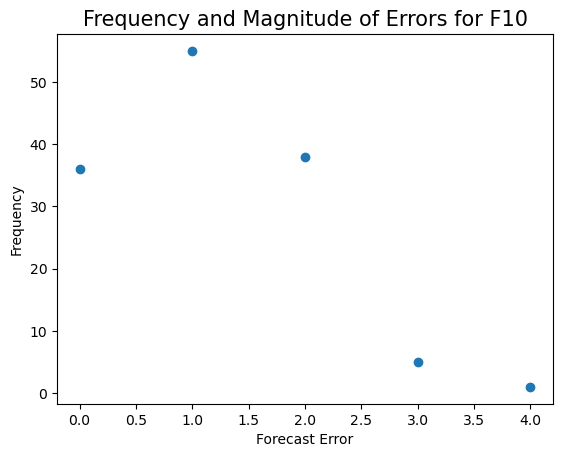

In [112]:
plt.scatter(freq.index, freq.values)

plt.xlabel("Forecast Error", size=10)
plt.ylabel("Frequency", size=10)
plt.title("Frequency and Magnitude of Errors for F10", size=15)

plt.show()

<h4> Fitting a Regression </h4>

In [113]:
lr = Ridge()

In [114]:
X=complete_df['Date']
X_axis=np.arange(len(X))
lr.fit(X_axis.reshape(-1,1), complete_df['Abs Error'])

Ridge()

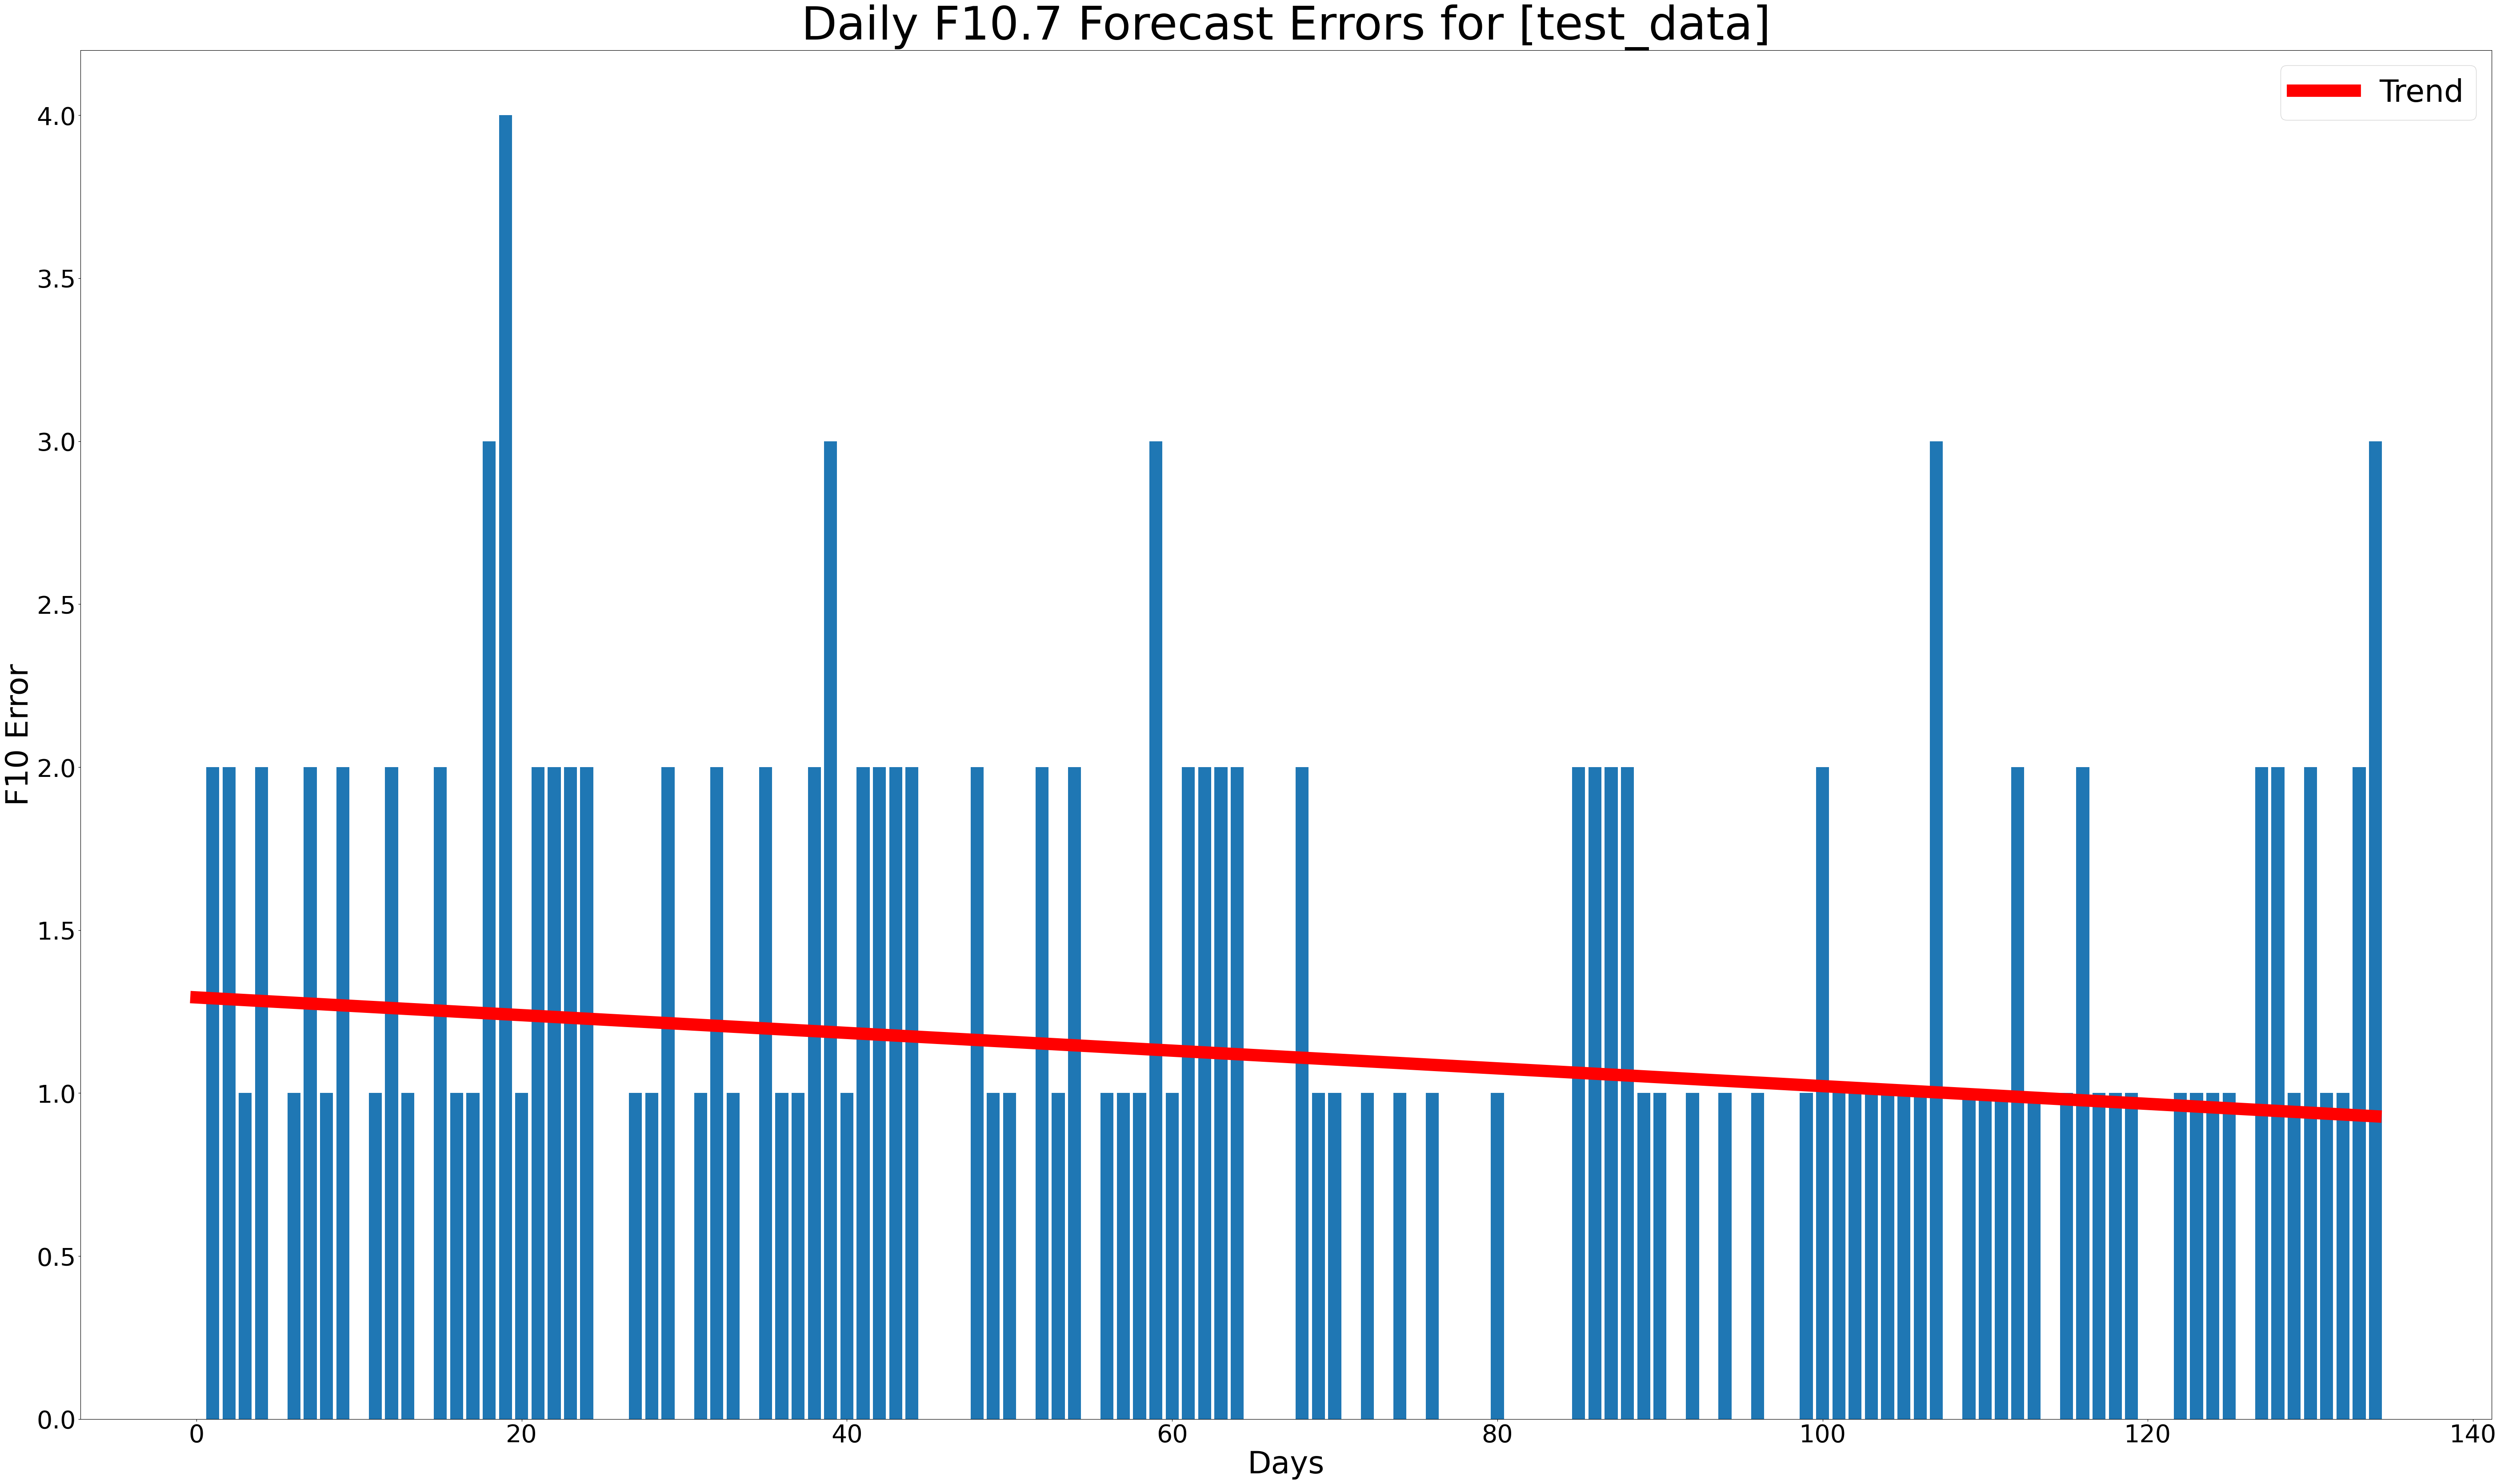

In [115]:
figure(figsize=(70, 40), dpi=100)

plt.bar(X_axis, complete_df['Abs Error'])
plt.plot(X_axis, lr.coef_*X_axis+lr.intercept_, color='red', linewidth=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)


plt.xlabel("Days", size=50)
plt.ylabel("F10 Error", size=50)
plt.title("Daily F10.7 Forecast Errors for [test_data]",fontsize=75)
plt.legend(['Trend'], fontsize=50)

plt.show()

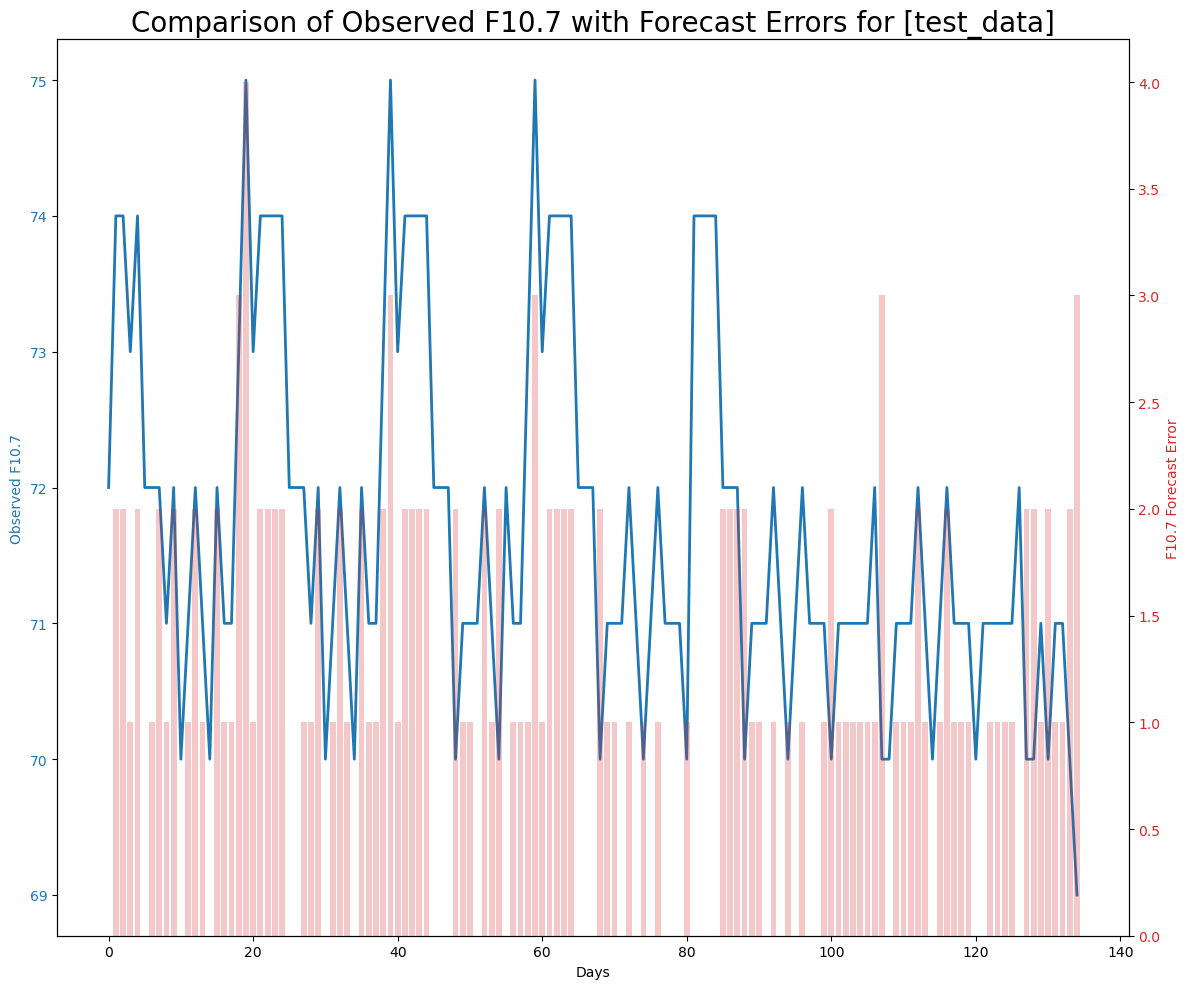

In [116]:
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:blue'
ax1.set_xlabel('Days')
ax1.set_ylabel('Observed F10.7', color=color)
ax1.plot(X_axis, complete_df['Observed F10'], color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('F10.7 Forecast Error', color=color)
ax2.bar(X_axis, complete_df['Abs Error'], color=color, alpha=0.25)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparison of Observed F10.7 with Forecast Errors for [test_data]",fontsize=20)

fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

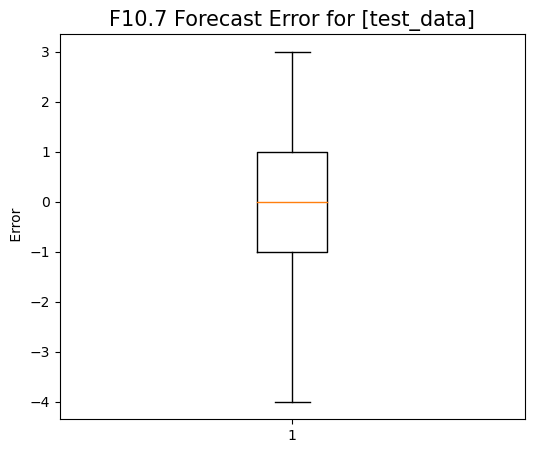

In [117]:
fig = plt.figure(figsize =(6, 5))
plt.boxplot(complete_df['Forecast Error'])


plt.ylabel(" Error", size=10)
plt.title("F10.7 Forecast Error for [test_data]",fontsize=15)

plt.show

<h4>Mean Absolute Percentage Error</h4>
Definition: The absolute value of the difference between the forecasted value and the actual value taken as a mean.

In [118]:
actual   = complete_df['Observed F10']
forecast = complete_df['Forecast F10']
  
APE = [] # percentage error between the forecast and observed value
  
for day in range(len(actual)):
    per_err = (actual[day] - forecast[day]) / actual[day]
    per_err = abs(per_err)
    APE.append(per_err)
  
MAPE = sum(APE)/len(APE)

print(f'''
MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE   : 0.02
MAPE % : 1.54 %



<h4> Accuracy (POD) </h4>
Definition: How many times the forecast was correct.

In [119]:
ACC = perfect/len(actual)
ACC

0.26666666666666666

<h4> False Alarm Ratio (FAR) </h4>
Definition: How many times the forecast was wrong.

In [120]:
FAR = (len(complete_df['Forecast F10'])-perfect) / len(complete_df['Forecast F10'])
FAR

0.7333333333333333

*Note: POD and FAR are typically used for categorical data rather than discrete data such as integers. The definitions of both have been applied libearlly in order to compute these values.*

<h4> Heidke Skill Score </h4>
Compares the accuracy of the forecasts against the accuracy of some reference model (coefficient of determination), normalized by a perfect model score of 1 against the same coefficient of determination.

In order to create a "skill score" we need to create a reference model based on the observed data points and determine its accuracy (Aref). A linear regression model "trend line" through all observed values will serve as a first guess model for this demonstration. Future efforts should be made to fit a more accurate model in order to extract more meaningful value from a skill score.

In [121]:
#lr.fit(X_axis.reshape(-1,1), complete_df['Observed F10'])

In [122]:
model = LinearRegression().fit(X_axis.reshape(-1,1), complete_df['Observed F10'])

In [123]:
r_sq = model.score(X_axis.reshape(-1,1), complete_df['Abs Error'])
r_sq

-6636.429300864099

In [124]:
Aperf = 1
Aref = r_sq

SS = (ACC - Aref)/(Aperf-Aref) # skill score formula
SS

0.9998895154584565

In [125]:
if SS == 1:
    print("The forecast is perfect")
elif SS > 0:
    print("The forecast is skillful and better than some reference.")
else:
    print("The forecast is less skillful than some reference.")

The forecast is skillful and better than some reference.


Now let's define a good forecast as an error no greater than 5.

In [126]:
print(f' Recall there are {count5} forecasts with errors greater than 5.')

 Recall there are 0 forecasts with errors greater than 5.


And we will define an accuracy below 70% as a bad forecast.

In [127]:
ACC5 = (len(actual)-count5)/len(actual)

if ACC5 == 1:
    print(f'The forecasts are perfect with an overall accuracy of {ACC5*100}%.')
elif ACC5 > .7:
    print(f'The forecasts are good with an overall accuracy of {ACC5*100}%.')
else:
    print(f'The forecasts are bad with an overall accuracy of {ACC5*100}%.')

The forecasts are perfect with an overall accuracy of 100.0%.


<h3>Conclusions</h3>

This notebook successfully demonstrates proof of concept in assessing the accuracy of 27 Day F10.7 Forecasts using a test dataset. 